# IMPORT ALL THE NECESSARY LIBRARIES

# Aim :
 The main of the project is to predict the next word from the email dataset

In [88]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import LabelEncoder
# import the libraries for keras
import keras
from   keras.models import Model
from   keras.layers import Dense, Activation, LSTM, Dropout, Input, Embedding
from   tensorflow.keras.optimizers import RMSprop
from   keras.preprocessing.text import Tokenizer
from   keras.preprocessing      import sequence
from   tensorflow.keras.utils              import to_categorical
from   keras.callbacks          import EarlyStopping

# Load the Dataset

In [89]:
data = pd.read_csv('sms_spam.csv', delimiter = ',', encoding = 'latin-1')

In [90]:
print(data)

      type                                               text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5569  spam  This is the 2nd time we have tried 2 contact u...
5570   ham              Will Ã¼ b going to esplanade fr home?
5571   ham  Pity, * was in mood for that. So...any other s...
5572   ham  The guy did some bitching but I acted like i'd...
5573   ham                         Rofl. Its true to its name

[5574 rows x 2 columns]


In [91]:
# Display the top five rows of the dataset
print(data.head())

   type                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [92]:
# display the bottom five rows of the dataset
print(data.tail())

      type                                               text
5569  spam  This is the 2nd time we have tried 2 contact u...
5570   ham              Will Ã¼ b going to esplanade fr home?
5571   ham  Pity, * was in mood for that. So...any other s...
5572   ham  The guy did some bitching but I acted like i'd...
5573   ham                         Rofl. Its true to its name


In [93]:
# depict the shape of the dataset
print(data.shape)

(5574, 2)


In [95]:
# To check if any null values are present in the dataset
print(data.isnull().sum())

type    0
text    0
dtype: int64


# OBSERVATION:

No from the aboev observation, there are no NULL Values in the datset

# DISPLAY THE GRAPHICAL REPRESENTATION OF THE COUNT OF THE TYPE OF EMAIL

Text(0.5, 1.0, 'Type vs Count of email')

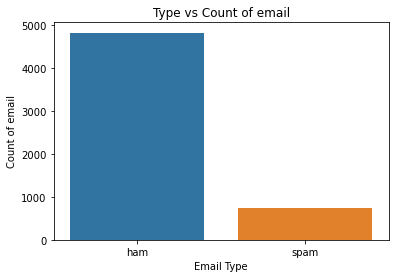

In [99]:
X = data.type

# display the graphical representation of the count of email type
sns.countplot(X)

plt.xlabel('Email Type')
plt.ylabel('Count of email')
plt.title('Type vs Count of email')

# DATA PREPROCESSING OF INPUT USING LABEL ENCODING

In [101]:
X = data.text
Y = data.type
# call the label encoder
lab = LabelEncoder()
# transform the type of email using label encoder
Y = lab.fit_transform(Y)
print(Y)
# Reshape the value of Y
Y = Y.reshape(-1,1)
print(Y)

[0 0 1 ... 0 0 0]
[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


# Divide the data into training and testing data

In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.15)

In [103]:
X_train.shape

(4737,)

# TOKENIZATION

It refers to the process of breaking the texts into words

In [106]:
from keras.preprocessing import sequence
# maximum length of words
max_words = 1000
max_len   = 150
# create the tokenizer object
tok = Tokenizer(num_words = max_words)
# using the tokenizer object train the data
tok.fit_on_texts(X_train)
# create the sequences to break the texts into the lists of words
sequences = tok.texts_to_sequences(X_train)
# create the sequence matrix
sequence_matrix = sequence.pad_sequences(sequences, maxlen = max_len)
print(sequence_matrix)

[[  0   0   0 ...   4 120  61]
 [  0   0   0 ... 231  74 237]
 [  0   0   0 ...   2 467  21]
 ...
 [  0   0   0 ...  12  31 429]
 [  0   0   0 ...  34 368  51]
 [  0   0   0 ... 502   4  75]]


## 1.  Here in Keras, we use an embeding function that takes every word from the sentence and converts the word into the vector form and in integer.
## 2.  So that with the integer form of the model, the model can be easily trained.

In [111]:
def RNN():
    # define the input layer
    inputs = Input(name = 'inputs', shape = [max_len])
    # define the embedding layer on the onput layer
    layer = Embedding(max_words, 50, input_length = max_len)(inputs)
    # define the LSTM Layer
    layer = LSTM(64)(layer)
    
    # define the first dense layer
    layer = Dense(256, name = 'FC1')(layer)
    # define the activation layer for the dense layer
    layer = Activation('relu')(layer)
    
    # perform the dropout operation to reduce the number of neurons
    layer = Dropout(0.5)(layer)
    
    # define the output layer
    layer = Dense(1, name = 'output_layer')(layer)
    # define the activation layer for the out put layer
    layer = Activation('sigmoid')(layer)
    
    # define the model for input layer
    model = Model(inputs = inputs, outputs = layer)
    return(model)

In [112]:
model = RNN()

# SUMMARY OF RNN MODEL

In [113]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_15 (Embedding)    (None, 150, 50)           50000     
                                                                 
 lstm_14 (LSTM)              (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_28 (Activation)  (None, 256)               0         
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 output_layer (Dense)        (None, 1)                 257 

# COMPILE THE RNN MODEL

In [114]:
model.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

# TRAIN THE RNN MODEL

In [116]:
model.fit(sequence_matrix, Y_train, batch_size = 128, epochs = 10, validation_split = 0.1, callbacks = [EarlyStopping(monitor = 'val_loss', min_delta = 0.0001)])

Epoch 1/10
34/34 [==============================] - 5s 154ms/step - loss: 0.0302 - accuracy: 0.9913 - val_loss: 0.1162 - val_accuracy: 0.9747
Epoch 2/10
34/34 [==============================] - 5s 141ms/step - loss: 0.0227 - accuracy: 0.9939 - val_loss: 0.1030 - val_accuracy: 0.9747


# ACCURACY OF RNN MODEL

In [117]:
# create the sequences of the model
sequences = tok.texts_to_sequences(X_test)
print(sequences)

[[95, 8, 61, 6, 10, 74, 699, 733, 38, 476], [32, 1, 30, 69, 208, 3, 164, 13, 879, 487, 7, 491, 23, 245, 10, 351], [24, 337, 82, 27, 3, 109, 7, 182, 152, 109, 32, 96, 27, 42, 41, 12, 10], [536, 20, 433, 31, 4, 61, 23, 1, 93, 128, 15, 20, 96, 326, 317, 22, 3, 215, 85, 137, 218, 29, 3, 70, 2, 57, 2, 201, 6, 27, 102, 10, 51, 88], [644, 13, 805, 310, 709, 12, 344, 806, 807, 857, 193, 1, 434, 585, 16, 710, 378, 672, 404, 858], [175, 78, 415, 1, 515, 12, 11, 66, 25, 31, 112, 339, 11, 66, 10, 12, 515, 200], [701, 68, 10, 46, 269], [37, 122, 9, 4, 590, 32, 3, 82, 87, 2, 213], [539, 57, 110, 1, 137, 9, 92, 511], [420, 517, 161, 31, 597, 135, 2, 47, 161, 52, 88, 6], [83, 77, 16, 110], [377, 77, 214, 2, 333, 142, 68, 10, 46, 269, 89, 31, 751], [1, 53, 4, 594, 73, 4, 493, 36, 5, 259, 847, 233, 55, 36, 4, 106, 94, 20], [70, 5, 340, 360, 810, 784, 111, 444, 255, 363, 526, 303, 990, 91, 24, 16, 900, 12, 558, 139], [58, 511, 11, 731, 50, 22, 3, 643, 95, 337, 1, 123, 22, 3, 306, 11, 58, 572, 22, 3, 11, 

In [118]:
# create the sequence matrix
sequence_matrix = sequence.pad_sequences(sequences, maxlen = max_len)

In [119]:
# calculate the loss and accuracy of RNN Model
loss, accuracy = model.evaluate(sequence_matrix, Y_test)
print("Loss of the model is:", loss)
print("accuracy of the model is:", (accuracy*100.0))

27/27 [==============================] - 1s 19ms/step - loss: 0.0757 - accuracy: 0.9809
Loss of the model is: 0.07570720463991165
accuracy of the model is: 98.08841347694397


# PREDICT WHETHER THE EMAIL TYPE IS HAM OR SPAM FOR THE GIVEN TEST DATA

In [120]:
test_data = ["Oh k...i'm watching here:)"]

# perform the tokenization on the given text
words = tok.texts_to_sequences(test_data)

# create the sequence matrix from the tokens
sequences = sequence.pad_sequences(words, maxlen = max_len)

In [121]:
# predict the model
prediction = model.predict(sequences)
print(prediction)

[[2.6428463e-05]]


# Observation:
 As the prediction is 2.64 which is greater than 0, so the email belongs to ham class